In [1]:
## Based on https://machinelearningmastery.com/lstm-autoencoders/

In [2]:
# Import
from numpy import array

In [3]:
# define input sequence
sequence = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(sequence)
sequence = sequence.reshape((1, n_in, 1))

In [4]:
print (sequence.shape, sequence)

(1, 9, 1) [[[0.1]
  [0.2]
  [0.3]
  [0.4]
  [0.5]
  [0.6]
  [0.7]
  [0.8]
  [0.9]]]


In [5]:
## Install if not already done
# !pip install keras
# !pip install tensorflow

In [6]:
# Import for keras
import tensorflow as tf
# Next line needed due to this error: https://stackoverflow.com/questions/58352326/running-the-tensorflow-2-0-code-gives-valueerror-tf-function-decorated-functio
tf.config.run_functions_eagerly(True)

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model


In [7]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

In [8]:
# fit model
model.fit(sequence, sequence, epochs=300, verbose=0)

/Users/biplavs/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [9]:
# Printing model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 repeat_vector (RepeatVector  (None, 9, 100)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 9, 100)            80400     
                                                                 
 time_distributed (TimeDistr  (None, 9, 1)             101       
 ibuted)                                                         
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [10]:
# demonstrate recreation
yhat = model.predict(sequence, verbose=0)
print(yhat[0,:,0])

[0.1048886  0.20068116 0.29913366 0.39909855 0.4996581  0.5999978
 0.7000423  0.79999393 0.9002566 ]


In [11]:
## Installations for plotting, as needed
#!pip install pydot
#!pip install pydotplus
#!pip install graphviz
# OR
#!pip uninstall pydot_ng
#!pip uninstall graphviz

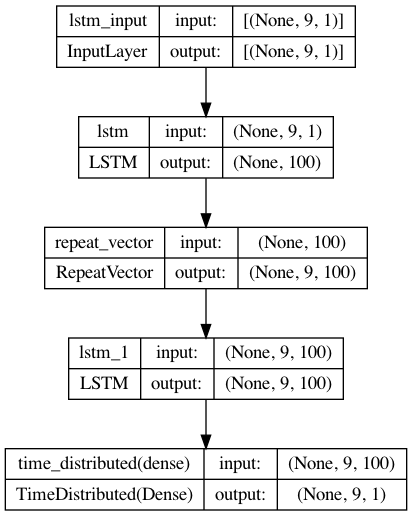

In [12]:
plot_model(model, show_shapes=True, to_file='data/reconstruct_lstm_autoencoder.png')

## Now Predicting Next Number in Sequence

In [13]:
# define input sequence
seq_in = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(seq_in)
seq_in = seq_in.reshape((1, n_in, 1))
# prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1

In [14]:
print (seq_out.shape, seq_out)

(1, 8, 1) [[[0.2]
  [0.3]
  [0.4]
  [0.5]
  [0.6]
  [0.7]
  [0.8]
  [0.9]]]


In [15]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
# Notice output dimension used with REPEAT
model.add(RepeatVector(n_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

In [16]:
# fit model
model.fit(seq_in, seq_out, epochs=300, verbose=0)

In [17]:
# Printing model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 repeat_vector_1 (RepeatVect  (None, 8, 100)           0         
 or)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 8, 100)            80400     
                                                                 
 time_distributed_1 (TimeDis  (None, 8, 1)             101       
 tributed)                                                       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Show output
yhat = model.predict(seq_in, verbose=0)
print(yhat[0,:,0])

[0.16500105 0.28907645 0.40308577 0.5097029  0.61056215 0.70693123
 0.79983324 0.89011186]


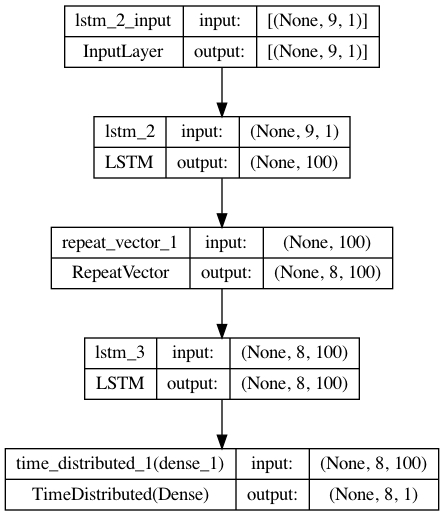

In [19]:
plot_model(model, show_shapes=True, to_file='data/reconstruct_lstm_nextnum.png')

## Task 1: Predict for English characters

In [ ]:
seq_in = array([a, b, c, d, e, f, g, h, i, j, ]